# time complexity of document similarity measurement
# Mohammad Reza Shabani
# candidate number : 269450

# introduction:

The similarity measure is a technique used in data science to determine how closely related or dissimilar two data samples are to each other. To analyze and understand problems and algorithms in theoretical computer science, time complexity is arguably the most important aspect. Time complexity describes how long it takes to solve an instance of a problem based on its size. Traditionally studied using rigorous mathematical techniques, complexity results are understood in terms of a family of functions of instance size, such as O(n) which describe the asymptotic scaling of operation counts. In theoretical computer science, such results are compact descriptors of algorithm performance. Additionally, they convey information regarding the feasibility of using a particular algorithm for a given problem instance.

This report discusses the time complexities of similarity measurements. In this study, I analyze the time complexity of Jaccard's and cosine's similarities theoretically and empirically. In addition, vector iteration, numpy array and sparse dictionary representations will be compared with each other in terms of cosine similarity measures. All pair similarity measurements and their time complexity for both Jaccard's and cosine's implementations will be discussed afterwards, as well as how empirical results differ from theoretical predictions. A parallel processing method for calculating all pair similarity will be implemented using the Map Reduce paradigm. First of all, I start with importing and downloading required dictionaries and documents:

In [ ]:
#importing required dictionaries and modules:
import numpy as np
import pandas as pd
import time
import scipy.stats as stats
import math
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('brown')
from nltk.corpus import brown
from collections import defaultdict
from multiprocessing import Pool
print(brown.sents()[:5])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'by', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', '.'], ['``', 'Only', 'a', 'relative', 'handful', 'of', 'such', 'rep

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [ ]:
words_list = []
for i in brown.sents():
    for j in i:
        words_list.append(j)

print(words_list[:50])

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.', 'The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise']


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
sorted_words_list = []
for i in words_list:
    if i.isalpha() == True:
        sorted_words_list.append(i.lower())
new_words_list =[]
for i in sorted_words_list:
    if i not in stop_words:
        new_words_list.append(i)

len(new_words_list)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


509267

In [ ]:
#making a dictionary
my_dict = {}
for i in new_words_list:
    my_dict[i] = my_dict.get(i,0)+1

key_list = list(my_dict.keys())
value_list = list(my_dict.values())

print(len(my_dict))
print(key_list[:50])
print(value_list[:50])

40097
['fulton', 'county', 'grand', 'jury', 'said', 'friday', 'investigation', 'recent', 'primary', 'election', 'produced', 'evidence', 'irregularities', 'took', 'place', 'presentments', 'city', 'executive', 'committee', 'charge', 'deserves', 'praise', 'thanks', 'atlanta', 'manner', 'conducted', 'term', 'charged', 'superior', 'court', 'judge', 'durwood', 'pye', 'investigate', 'reports', 'possible', 'ivan', 'allen', 'relative', 'handful', 'received', 'considering', 'widespread', 'interest', 'number', 'voters', 'size', 'find', 'many', 'registration']
[17, 155, 48, 67, 1961, 60, 51, 179, 96, 77, 90, 204, 8, 426, 570, 1, 393, 55, 168, 122, 16, 17, 37, 35, 124, 55, 79, 57, 46, 230, 77, 1, 1, 11, 84, 374, 4, 20, 46, 13, 163, 47, 30, 330, 472, 20, 138, 400, 1030, 23]


In [ ]:
#creating a pair of dictionary in specific size:
import random
def create_document(len_of_key ,doc_number = 2):
    document_list = []
    for i in range(doc_number):
        random_list = random.sample(list(range(len(key_list))), len_of_key)
        document = {key_list[j]:my_dict[key_list[j]] for j in random_list}
        document_list.append(document)
    return document_list

create_document(5,2)

[{'dioxide': 2, 'ballad': 8, 'fritters': 1, 'insets': 1, 'unheeded': 2},
 {'authorizes': 2,
  'bongo': 1,
  'arrowheads': 1,
  'contortion': 1,
  'effectuate': 2}]

In [ ]:
#creating list of pair of documents with specific size:
def document_collection(len_of_doc):
    pair_document = []
    for i in range(600,len_of_doc):
        pair_document.append(create_document(i,2))
    return pair_document

pair_list = document_collection(1000)
list_of_documents = []
for i in pair_list:
            for j in i:
                list_of_documents.append(j)
len(pair_list)

400

# Jaccard Similarity

When comparing two items, such as two text documents, the Jaccard Similarity is a typical proximity statistic that counts the number of phrases that appear in both documents. The definition of a Jaccard similarity is the intersection of two documents divided by the union of those two documents, where the number of common words over the total number of words is the reference.

$J(A,B)=\cfrac{\mid A\cap B\mid}{\mid A \cup B\mid}$


# Worst case running time of jaccard similarity - theoretical

We have to determine the union and intersection of the set when doing the Jaccard similarity. The worst-case running time for finding the union of the set is O(n) since we have to repeatedly loop through each item in the dictionary. Now, in order to identify the intersection of the two sets, we must loop through every entry in one dictionary to see if the same key appears in the second dictionary, which has an O(n) complexity on its own. Hash collisions are increasingly likely to occur as the dictionary size grows. Therefore, if there are no hash collisions, the worst-case time complexity of the algorithm we adopt is O(n).

In [ ]:
#finding total number of words
def total_frequency(dictionary):
    Sum = 0
    for i in dictionary:
        Sum += dictionary[i]
    return Sum

#jaccard algorithm
def jaccard(d1,d2):
    intersection = {}
    for i in d1.keys():
        if i in d2.keys():
            intersection[i] = min(d1[i],d2[i])
    total_intersection = total_frequency(intersection)
    union = total_frequency(d1)+total_frequency(d2) - total_intersection
    return round(total_intersection/union,5)

In [ ]:
#finding average running time
def time_it(function,*arg,repeats=100,**kwarg):
    time_list=[]
    for i in range(repeats):
        start = time.time()
        function(*arg,**kwarg)
        end = time.time()
        time_list.append(end - start)
    total = 0
    for i in time_list:
        total += i
    mean = total/len(time_list)
    return mean

Any algorithm's running time must be calculated by running it repeatedly with the same input and averaging the results to make sure the algorithm is not influenced by sudden changes in the computer's other background processes. The "time-it" function in above carries out this.

# Running time of jaccard similarity-Empirical

In order to find the time complexity, we assume that the curve has the following form:

$y=c_a.x^n$

We can now apply log on both sides of the equation as follows:

$\log(y) = \log(c_a) + n \log(x)$

We now have an equation for a straight line in which $\log(c_a)$ is the intercept and $α$ is the slope.


In [ ]:
#time for different length of documents:
jaccard_time_list =[]
for i in range(len(pair_list)):
    Time =time_it(jaccard,pair_list[i][0],pair_list[i][1],repeats = 100)
    jaccard_time_list.append(Time)
print(jaccard_time_list)
len(jaccard_time_list)

[0.00018949508666992186, 0.00017984867095947266, 0.00020014047622680665, 0.00018881797790527345, 0.00018953561782836915, 0.0001695394515991211, 0.0001845407485961914, 0.00016958236694335937, 0.0001695108413696289, 0.0001795816421508789, 0.00016947507858276368, 0.0001795339584350586, 0.00017569303512573241, 0.0001695680618286133, 0.00017951011657714843, 0.00017913341522216798, 0.00018986940383911133, 0.0001795053482055664, 0.00016959667205810548, 0.00017662763595581056, 0.0001795482635498047, 0.0001795172691345215, 0.00017913103103637696, 0.00017573118209838868, 0.00017979860305786133, 0.00019916296005249024, 0.0001994776725769043, 0.00019950389862060546, 0.0001894378662109375, 0.00017957687377929689, 0.00018909454345703125, 0.00018948793411254882, 0.0001795196533203125, 0.00018949508666992186, 0.00017952203750610352, 0.00018949270248413085, 0.0001795196533203125, 0.00018949508666992186, 0.00018949031829833984, 0.00018949270248413085, 0.00018983840942382813, 0.00019032716751098632, 0.00

400

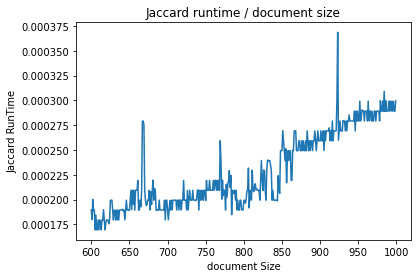

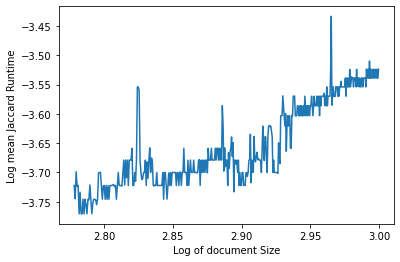

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
x = list(range(600,len(pair_list)+600))
y = jaccard_time_list
plt.xlabel('document Size')
plt.ylabel('Jaccard RunTime')
plt.title('Jaccard runtime / document size')
plt.plot(x,y)
plt.show()

logx = [np.log10(i )for i in x]
logy = [np.log10(i) for i in y]
#plotting the graph between the log values
plt.plot(logx,logy)
plt.ylabel("Log mean Jaccard Runtime")
plt.xlabel('Log of document Size')
plt.show()

In [ ]:
slope_jaccard,intercept, r_value, p_value ,std_err = stats.linregress(logx,logy)
constant = np.power(10,intercept)
print("The slope is {} and the Constant is {}".format(slope_jaccard,constant))

The slope is 0.9905086286909105 and the Constant is 3.0343614463864507e-07


I have obtained α values ranging from 0.9 to 1.2 by repeatedly executing the Jaccard algorithm, with a mode value of 0.99 and the computation's constant of $10^{-7}$. Therefore, our implementation's time complexity is almost $ 𝑂(𝑛^{0.99})$, which is still faster than the worst-case run time of the Jaccard algorithm.
Since the function's run time is y and the bag size is x,from the empirical analysis we can write:

$y=10^{-7}.x^{0.99}$


# the cosine similarity

Similarity between two vectors of an inner product space is measured by cosine similarity. The cosine of the angle between two vectors determines whether two vectors point roughly in the same direction. In document analysis, it is commonly used for measuring similarity between texts. An attribute in a document indicates how often a particular word (or phrase) appears in the document. As a result, every document is represented by a term-frequency vector.

$cos\theta = \cfrac{A\cdot B}{\sqrt{A\cdot A}\sqrt{B\cdot B}}$

In [ ]:
#dense vector pairs generation:
def dense_vectors_np_array(d1,d2):
    listA = list(d1.keys())
    listB = list(d2.keys())
    merge_list = list(set(listA + listB))
    listA_k = []
    listB_k = []
    for i in merge_list:
        if i in d1.keys():
            listA_k.append(d1[i])
        else:
            listA_k.append(0)

    for i in merge_list:
        if i in d2.keys():
            listB_k.append(d2[i])
        else:
            listB_k.append(0)
    return np.asarray(listA_k) ,np.asarray(listB_k)

In [ ]:
#create a list of numpy vector pairs:
vectors_np_pair = []
for i in pair_list:
    vectors_np_pair.append(dense_vectors_np_array(i[0],i[1]))


# Cosine similarity – vector iteration – theorical worst case:

Here is a cosine similarity function. It takes two lists of NumPy arrays and loops through each element to find the dot product and modulus of each vector.
During the execution of the cosine similarity function, there are 4 for loops with time complexity of O(n), giving the entire function an O(n) time complexity.

# Cosine similarity – vector iteration – empirical time complexity:

In [ ]:
#calculating modulus of vector
def m_vec(vector):
    total = 0
    for i in vector:
        total += i**2
    return np.sqrt(total)

#function for finding cosine similarity
def cosine_sim_vector(A,B):
    sum = 0
    for i in range(len(A)):
        sum += A[i]*B[i]
    MA = m_vec(A)
    MB = m_vec(B)
    return round(sum/(MA*MB),5)

In [ ]:
cosine_vector_time =[]
for i in vectors_np_pair:
    k = time_it(cosine_sim_vector,i[0],i[1],repeats = 100)
    cosine_vector_time.append(k)

In [ ]:
len_vectors_np_pair = []
for i in vectors_np_pair:
    len_vectors_np_pair.append(len(i[0]))

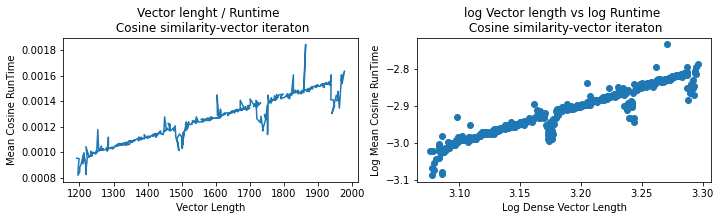

In [ ]:
plt.subplots_adjust(1,0,2.5,0.5)
plt.subplot(121)
plt.plot(len_vectors_np_pair,cosine_vector_time)
plt.xlabel('Vector Length')
plt.ylabel('Mean Cosine RunTime')
plt.title('Vector lenght / Runtime \n Cosine similarity-vector iteraton')
plt.subplot(122)
x = len_vectors_np_pair
y = cosine_vector_time
logX = np.log10(x)
logY = np.log10(y)
plt.scatter(logX,logY)
plt.title('log Vector length vs log Runtime \n Cosine similarity-vector iteraton')
plt.xlabel('Log Dense Vector Length')
plt.ylabel('Log Mean Cosine RunTime')
plt.show()

In [ ]:
slope_cosine_vec, intercept, r_value, p_value, std_errd = stats.linregress(logX,logY)
constant = np.power(10, intercept)
print('The slope is {} and the constant is {}'.format(slope_cosine_vec,constant))

The slope is 0.9780113039023203 and the constant is 9.299643317942943e-07


After multiple runs, the equation has a mode value of α = 0.97. Therefore, our time complexity is almost $ 𝑂(𝑛^{0.97})$, which supports theoretical prediction of O(n).
Also, the constant Ca for the computation is of the order of $10^{-7}$ .
The function can be expressed empirically as $y=10^{-7}.x^{0.97}$ , where y is the run time and x is the vector length.


# Cosine similarity –NumPy array – theorical time complexity:


When using NumPy methods to access an element in a NumPy array, the time complexity is O(1). I created a new cosine similarity function based on NumPy methods. Here, the time complexity is independent of the length of the vector, in contrast to the cosine similarity with vector iteration. The cosine function's time complexity will be O(n) if it contains any lists that are transformed to NumPy arrays. However, since there is no conversion from a list to an array in our function, the theoretical time complexity of our function should be O(1).

# Cosine similarity –NumPy array – empirical time complexity:

In [ ]:
#function for finding similarity by numpy
def cosine_sim_numpy(X,Y):
    modX = np.sqrt(np.dot(X,X))
    modY = np.sqrt(np.dot(Y,Y))
    cosine_sim = np.dot(X,Y)/(modX*modY)
    return round(cosine_sim,5)

In [ ]:
cosine_np_time = []
for i in vectors_np_pair:
    M = time_it(cosine_sim_numpy,i[0],i[1],repeats=200)
    cosine_np_time.append(M)

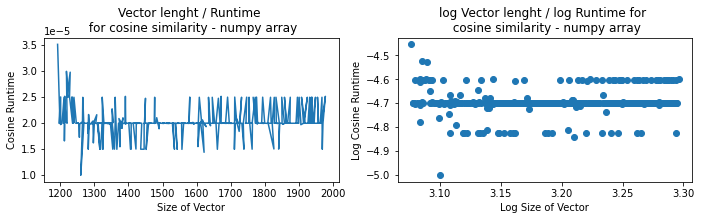

In [ ]:
plt.subplots_adjust(1,0,2.5,0.5)
plt.subplot(121)
plt.plot(len_vectors_np_pair,cosine_np_time)
plt.ylabel('Cosine Runtime')
plt.xlabel('Size of Vector')
plt.title('Vector lenght / Runtime \n for cosine similarity - numpy array')
plt.subplot(122)
x = len_vectors_np_pair
y = cosine_np_time
logX = np.log10(x)
logY = np.log10(y)
plt.scatter(logX,logY)
plt.xlabel('Log Size of Vector')
plt.ylabel('Log Cosine Runtime')
plt.title('log Vector lenght / log Runtime for \n cosine similarity - numpy array')
plt.show()

In [ ]:
slope_cosine_np, intercept, r_value , p_value , std_err = stats.linregress(logX,logY)
constant = np.power(10,intercept)
print('The slope is {} and the Constant is {}'.format(slope_cosine_np,constant))

The slope is 0.04784860657288063 and the Constant is 1.4157727515051911e-05


In several running of the algorithm, the function's value(α) varies from 0.01 to 0.10, with a mode value of 0.04. The calculation's constant is on the order of 10-5.
Therefore, empirically, we can write $y=10^{-5}.x^{0.04}$. It indicates that with using NumPy array method, time complexity is $𝑂(𝑛^{0.04})$ that support our theoretical time complexity of O(1). we empirically discovered that the run time of the cosine similarity in NumPy array method, is almost independent of the vector dimension.


# Comparing cosine vector and cosine NumPy

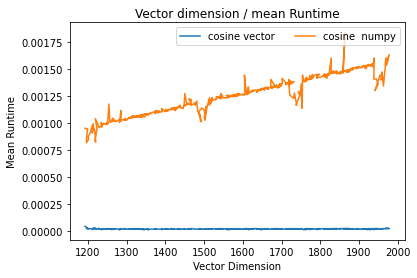

In [ ]:
plt.plot(len_vectors_np_pair,cosine_np_time)
plt.plot(len_vectors_np_pair,cosine_vector_time)
plt.xlabel('Vector Dimension')
plt.ylabel('Mean Runtime')
plt.title('Vector dimension / mean Runtime')
label =['cosine vector', 'cosine  numpy']
plt.legend(label, loc = 1, ncol = 2)
plt.show()

this graph shows that cosine similarity-vector iteration takes more time in comparison with cosine NumPy.

# Cosine similarity –sparse dictionary – theorical time complexity:

Due to a loop in the code that iterates across dictionary elements, the cosine similarity implementation using a sparse dictionary will have an O(n) time complexity. The size of the document we compare will be smaller if we implement the cosine similarity straight from sparse dictionaries since we won't need to convert it to the dense representation, which has a larger size. Consequently, the run time will be quicker than the cosine method using vector iteration.
The execution time of this approach will not be faster than the cosine implementation using NumPy, because each element can be accessed directly when using the NumPy technique.
Jaccard and cosine sparse have the same time complexity O(n).

The code that follows directly calculates the cosine similarity between two dictionaries given as input.

# Cosine similarity –sparse dictionary – empirical time complexity:

In [ ]:
#function for finding similarity using sparse dictionaries
def dot(dic1,dic2):
    dotproduct = 0
    if len(dic1) < len(dic2):
        for word,count in dic1.items():
            dotproduct += count * dic2.get(word,0)
    else:
        for word,count in dic2.items():
            dotproduct += count * dic1.get(word,0)
    return dotproduct

def cosine_sparse(dic1,dic2):
    return round(dot(dic1,dic2)/np.sqrt(dot(dic1,dic1)*dot(dic2,dic2)),5)

In [ ]:
cosine_sparse_time = []
for i in pair_list:
    k = time_it(cosine_sparse,i[0],i[1],repeats=100)
    cosine_sparse_time.append(k)

In [ ]:
len_doc_pair_list = []
for i in pair_list:
    len_doc_pair_list.append(len(i[0]))

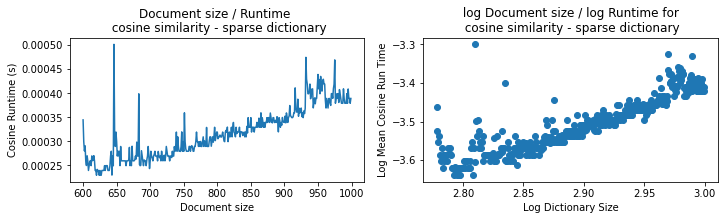

In [ ]:
x = len_doc_pair_list
y = cosine_sparse_time
plt.subplots_adjust(1,0,2.5,0.5)
plt.subplot(121)
plt.plot(x,y)
plt.xlabel("Document size")
plt.ylabel("Cosine Runtime (s)")
plt.title('Document size / Runtime \n cosine similarity - sparse dictionary')
plt.subplot(122)
logx = np.log10(x)
logy = np.log10(y)

plt.scatter(logx,logy)
plt.xlabel('Log Dictionary Size')
plt.ylabel('Log Mean Cosine Run Time')
plt.title(' log Document size / log Runtime for \n cosine similarity - sparse dictionary')

plt.show()

In [ ]:
slope_cosine_sparse , intercept, r_value , p_value , std_err = stats.linregress(logx,logy)
constant = np.power(10,intercept)
print('The slope is {} and the constant is {}'.format(slope_cosine_sparse,constant))

The slope is 0.992196757013189 and the constant is 4.152769773945751e-07


Empirically, the cosine similarity implementation time complexity using sparse dictionaries is $𝑂(𝑛^{0.99})$, which is marginally better than the theoretical worst case of O(n)

$y=10^{-7}.x^{0.99}$

# Data Frame

In [ ]:
jaccard_values = []
for i in list(range(len(pair_list))):
    A = jaccard(pair_list[i][0],pair_list[i][1])
    jaccard_values.append(A)

In [ ]:
cosine_vector_values =[]
for i in list(range(len(vectors_np_pair))):
    A = cosine_sim_vector(vectors_np_pair[i][0],vectors_np_pair[i][1])
    cosine_vector_values.append(A)

In [ ]:
cosine_numpy_values =[]
for i in list(range(len(vectors_np_pair))):
    A = cosine_sim_numpy(vectors_np_pair[i][0],vectors_np_pair[i][1])
    cosine_numpy_values.append(A)

In [ ]:
cosine_sparse_values =[]
for i in list(range(len(pair_list))):
    cosine_sparse_values.append(cosine_sparse(pair_list[i][0],pair_list[i][1]))

In [ ]:
data = {'Jaccard similarity': jaccard_values,'cosine similarity - vector iteration':cosine_vector_values, 'cosine similarity - numpy array':cosine_numpy_values,'cosine similarity - sparse representation':cosine_sparse_values}
data_frame = pd.DataFrame(data)
data_frame

,Jaccard similarity,cosine similarity - vector iteration,cosine similarity - numpy array,cosine similarity - sparse representation
0,0.00552,0.00166,0.00166,0.00166
1,0.00023,0.00000,0.00000,0.00000
2,0.02960,0.16750,0.16750,0.16750
3,0.00337,0.00080,0.00080,0.00080
4,0.00157,0.00010,0.00010,0.00010
...,...,...,...,...
395,0.00518,0.00119,0.00119,0.00119
396,0.00650,0.00346,0.00346,0.00346
397,0.00663,0.00194,0.00194,0.00194
398,0.00502,0.00251,0.00251,0.00251


By looking at the pandas Data Frame, it is clear that while there are differences between the cosine and Jaccard implementations similarity measures , all cosine implementations produce similar values that are the same for each pair of documents.

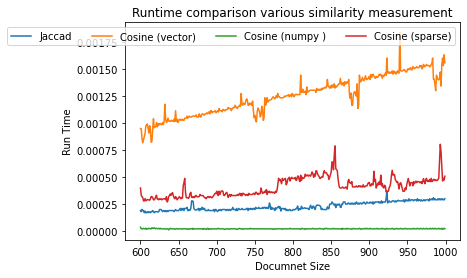

In [ ]:
plt.plot(len_doc_pair_list,jaccard_time_list)
plt.plot(len_doc_pair_list,cosine_vector_time)
plt.plot(len_doc_pair_list,cosine_np_time)
plt.plot(len_doc_pair_list,cosine_sparse_time)
label = ['Jaccad','Cosine (vector)','Cosine (numpy )','Cosine (sparse)']
plt.legend(label, loc = 1, ncol =4)
plt.xlabel('Documnet Size')
plt.ylabel('Run Time')
plt.title('Runtime comparison various similarity measurement')
plt.show()

The graph above can be used to make the following conclusions:

• Cosine similarity using the NumPy array module has the quickest runtime, followed by the Jaccard algorithm and then cosine sparse.

• Among the four similarity solutions, cosine similarity using vector iteration has the worst running time for a given document size.


# all pair similarity


All pair similarities for a group of documents are computed by the function all_pair_comparison. The function accepts a list of dictionaries as input list_of_documnents and has a parameter that can be changed to define the similarity measure to be applied.
The parameter methods are :
1) "Jaccard"
2) "Cosine_vector"
3) "Cosine_numpy"
4) "Cosine_sparse"


In [ ]:
#function for finding all pair similarity by different methods
def all_pair_comparison(document_lists, method= 'jaccard'):
    all_pair_sim = []
    if method =='jaccard':
        for i in document_lists:
            for j in document_lists:
                all_pair_sim.append(jaccard(i,j))
    if method == 'cosine_vector':
        for i in document_lists:
            for j in document_lists:
                x,y = dense_vectors_np_array(i,j)
                all_pair_sim.append(cosine_sim_vector(x,y))
    if method == 'cosine_numpy':
        for i in document_lists:
            for j in document_lists:
                x,y =dense_vectors_np_array(i,j)
                all_pair_sim.append(cosine_sim_numpy(x,y))

    if method == 'cosine_sparse':
        for i in document_lists:
            for j in document_lists:
                all_pair_sim.append(cosine_sparse(i,j))


    return all_pair_sim

# Theorical Worst case time complexity for all pair similarity

We need create a nested loop to go through all the documents in order to execute the all-pairs similarity, so we have a time complexity of $O(n^{2})$. The relevant similarity measure O(n) must then be executed in the inner loop. The time complexity of all-pair similarity depends on the size of the list of dictionaries and the size of each individual dictionary in the list.

The worst-case time complexity for all the similarity measures we took into consideration, with the exception of cosine similarity implementation using the NumPy module, will be $O(n^{3})$. assuming that the size of each dictionary is similar to the size of the list of dictionaries.

Because the cosine NumPy implementation is unaffected by the size of each individual dictionary, the time complexity for all-pair similarity for it will be $O(n^{2})$.

The time complexity for all similarity measure methods will be $O(n^{2})$ if we maintain the amount of dictionaries constant and justchange the size of the list of dictionaries.

# Empirical time complexity of all pair similarity – Jaccard

In [ ]:
all_pair_document_lists = create_document(1000,16)
print(all_pair_comparison(all_pair_document_lists,method = 'jaccard'))

[1.0, 0.00965, 0.03892, 0.01692, 0.02288, 0.00921, 0.00905, 0.02022, 0.015, 0.02167, 0.00918, 0.00976, 0.00681, 0.00595, 0.00697, 0.00791, 0.00965, 1.0, 0.0115, 0.00246, 0.02847, 0.01874, 0.00532, 0.01148, 0.01024, 0.00509, 0.00369, 0.00635, 0.00609, 0.00622, 0.02817, 0.02248, 0.03892, 0.0115, 1.0, 0.00917, 0.0122, 0.01416, 0.01002, 0.0233, 0.01759, 0.02476, 0.01751, 0.00651, 0.00617, 0.02355, 0.00555, 0.01058, 0.01692, 0.00246, 0.00917, 1.0, 0.00521, 0.007, 0.00353, 0.03222, 0.01372, 0.01877, 0.02556, 0.00843, 0.02074, 0.00331, 0.00946, 0.00771, 0.02288, 0.02847, 0.0122, 0.00521, 1.0, 0.01759, 0.02587, 0.01485, 0.0075, 0.01962, 0.01076, 0.00544, 0.00816, 0.02226, 0.00671, 0.03448, 0.00921, 0.01874, 0.01416, 0.007, 0.01759, 1.0, 0.02251, 0.01315, 0.00444, 0.01791, 0.00661, 0.01106, 0.01451, 0.01105, 0.00172, 0.02278, 0.00905, 0.00532, 0.01002, 0.00353, 0.02587, 0.02251, 1.0, 0.01456, 0.01216, 0.00837, 0.01777, 0.01501, 0.01814, 0.00868, 0.0139, 0.01015, 0.02022, 0.01148, 0.0233, 0.0322

In [ ]:
list_all_pair_document_lists = []
for i in range(50,70):
    list_all_pair_document_lists.append(create_document(i,i))

In [ ]:
#jaccard similarity

all_pair_lists_runtime_jaccard =[]
for i in range(len(list_all_pair_document_lists)):
    k = time_it(all_pair_comparison,list_all_pair_document_lists[i])
    all_pair_lists_runtime_jaccard.append(k)

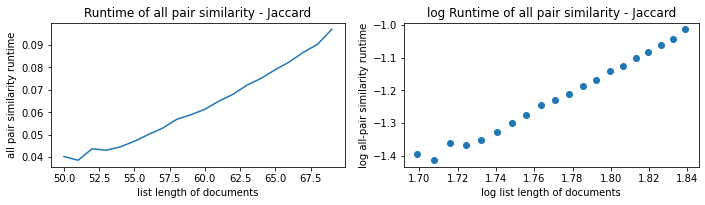

In [ ]:
y = all_pair_lists_runtime_jaccard
x = range(50,70)
plt.subplots_adjust(1,0,2.5,0.5)
plt.subplot(121)
plt.plot(x,y)
plt.xlabel('list length of documents')
plt.ylabel('all pair similarity runtime')
plt.title('Runtime of all pair similarity - Jaccard')
plt.subplot(122)
logx = np.log10(x)
logy = np.log10(y)
plt.scatter(logx,logy)
plt.xlabel('log list length of documents')
plt.ylabel('log all-pair similarity runtime')
plt.title('log Runtime of all pair similarity - Jaccard')

plt.show()

In [ ]:
slope, intercept, r_value, p_value , std_err = stats.linregress(logx,logy)
constant = np.power(10, intercept)
print('The slope is {} and the constant is {}'.format(slope,constant))

The slope is 2.9696120121699603 and the constant is 3.2352255965881925e-07


The following can be drawn from the above empirical analysis of the time complexity of all-pair similarity using Jaccard's method:

α = 2.96 and $Ca=10^{-7}$  the worst case time complexity of all-pair similarity is $O(n^{2.96})$, which supports the theoretical worst case run time prediction of $O(n^{3})$.

The run time and length of all pair similarity can be used to show:

$y=10^{-7}.x^{2.96}$


# Empirical time complexity of all pair similarity – cosine similarity – sparse

In [ ]:
all_pair_document_lists = create_document(1000,16)

print(all_pair_comparison(all_pair_document_lists,method = 'cosine_sparse'))

[1.0, 0.00802, 0.03198, 0.00328, 0.02956, 0.0248, 0.02038, 0.06352, 0.00067, 0.00276, 0.01327, 0.00164, 0.00802, 0.02727, 0.00781, 0.02527, 0.00802, 1.0, 0.14754, 0.03568, 0.07455, 0.00388, 0.00792, 0.0275, 0.00753, 0.00161, 0.00424, 0.00098, 0.03945, 0.00335, 0.00749, 0.00518, 0.03198, 0.14754, 1.0, 0.00421, 0.00574, 0.03953, 0.00219, 0.00059, 0.00174, 0.00118, 0.00062, 0.01221, 0.00172, 0.00058, 0.03312, 0.03755, 0.00328, 0.03568, 0.00421, 1.0, 0.00556, 0.00066, 4e-05, 0.00479, 0.00142, 0.0001, 0.03556, 0.00225, 0.00558, 0.19328, 0.00434, 0.00359, 0.02956, 0.07455, 0.00574, 0.00556, 1.0, 0.00245, 0.02359, 0.00818, 0.00269, 0.0004, 0.02742, 0.00168, 0.00923, 0.00173, 0.01484, 0.03682, 0.0248, 0.00388, 0.03953, 0.00066, 0.00245, 1.0, 0.481, 0.03935, 0.00259, 0.00072, 0.00121, 0.45897, 0.00357, 0.00252, 0.0145, 0.06191, 0.02038, 0.00792, 0.00219, 4e-05, 0.02359, 0.481, 1.0, 0.00109, 0.00104, 0.00209, 0.01255, 0.50953, 0.00265, 0.0004, 0.02413, 0.00229, 0.06352, 0.0275, 0.00059, 0.00479,

In [ ]:
#cosine similarity
all_pair_lists_runtime_cosine =[]
for i in range(len(list_all_pair_document_lists)):
    k = time_it(all_pair_comparison,list_all_pair_document_lists[i],method = 'cosine_sparse')
    all_pair_lists_runtime_cosine.append(k)

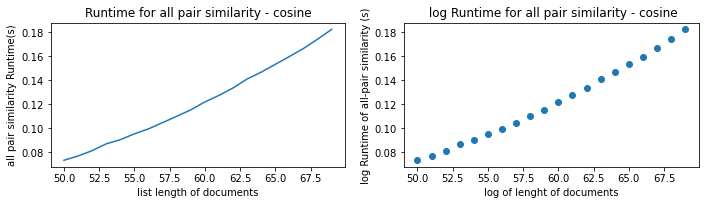

In [ ]:
y = all_pair_lists_runtime_cosine
x = list(range(50,70))
plt.subplots_adjust(1,0,2.5,0.5)
plt.subplot(121)
plt.plot(x,y)
plt.xlabel('list length of documents')
plt.ylabel('all pair similarity Runtime(s)')
plt.title('Runtime for all pair similarity - cosine')
plt.subplot(122)
logx = np.log10(x)
logy = np.log10(y)
plt.scatter(x,y)
plt.xlabel('log of lenght of documents')
plt.ylabel('log Runtime of all-pair similarity (s)')
plt.title(' log Runtime for all pair similarity - cosine')
plt.show()

In [ ]:
slope , intercept, r_value, p_value, std_err = stats.linregress(logx, logy)
constant = np.power(10,intercept)
print('The slope is {} and the constant for the computation is {}'.format(slope , constant))

The slope is 2.8303779763957926 and the constant for the computation is 1.131303728713529e-06


the empirical analysis of all-pair time complexity for cosine similarity with sparse representation make the following conclusion:

α≈2.8 and $Ca=10^{−6}$

the worst case time complexity of all-pair similarity is $O(n^{2.8})$ which support the theoretical worst case run time prediction : $O(n^{3})$.

The run time with length of all pair similarity of X can be represented as:

$y=10^{-6}.x^{2.8}$

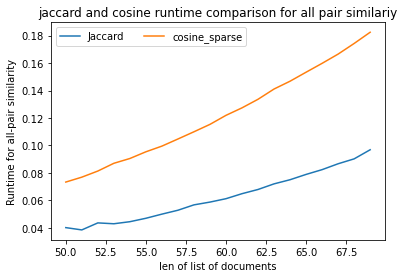

In [ ]:
plt.plot(list(range(50,70)),all_pair_lists_runtime_jaccard)
plt.plot(list(range(50,70)),all_pair_lists_runtime_cosine)
plt.ylabel('Runtime for all-pair similarity')
plt.xlabel('len of list of documents')
label = ['Jaccard', 'cosine_sparse']
plt.title('jaccard and cosine runtime comparison for all pair similariy')
plt.legend(label, loc =0 , ncol = 2)
plt.show()

The graph shows that Jaccard similarity takes less time to run than the cosine sparse. The graph also shows that the slope of the cosine sparse all-pair run time increases with the size of the dictionary list.

# time prediction for running all pair similarity for 200 k documents

•	For Jaccard similarity:

 $y=10^{-7}.x^{2.96}$ ⟹  $y=10^{-7}.200000^{2.96}$ :

 running time : 4.9 * $10^{8}$ s

•	For cosine_sparse similarity:

 $y=10^{-6}.x^{2.8}$ ⟹  $y=10^{-6}.200000^{2.8}$ :

 running time : 6.96 * $10^{8}$ s

As we expected running time for all pair similarity by cosine sparse similarity method takes more longer than Jaccard similarity

If individual document size is very small compared to 200k:
then the time complexity ≈ O(n2)

•	For Jaccard similarity:

 $y=10^{-7}.x^{2}$ ⟹  $y=10^{-7}.200000^{2}$ :

 running time : 4 * $10^{3}$ s

•	For cosine_sparse similarity:

 $y=10^{-6}.x^{2}$ ⟹  $y=10^{-6}.200000^{2}$ :

 running time : 4 * $10^{4}$ s

as we expected sparse takes more longer than Jaccard.

# Map-Reduce

Map-Reduce describes two distinct and separate tasks. A map job transforms one set of data into another, breaking down individual elements into tuples (key/value pairs).
Maps output tuples are used as input for reduce job, which combines those tuples into fewer tuples. The reduce job is always performed after the map job, as implied by the name MapReduce.
The Map-Reduce is used here so that the mapper calculates the similarity and iterates over the input, and the reducer just collects output from the collector and joins it together.


In [ ]:
#mapper function
def Map_jaccard(doc):
    output = []
    (i,j,doc_i,doc_j) = doc
    sim = jaccard(doc_i,doc_j)
    list_output.append(((i,j),sim))
    return output

In [ ]:
 def map_reduce(inputs,mapper,reducer,mapprocesses=4,reduceprocesses=4):
    A =defaultdict(list)
    m_pool = Pool(processes=mapprocesses)
    m_results=m_pool.map(mapper,inputs)
    m_pool.close()
    for i in m_results:
        for (key, value) in i:
            A[key].append(value)
    mr_list=[]
    reduce_pool = Pool(processes=reduceprocesses)
    r_results=reducepool.map(reducer,A.items())
    reduce_pool.close()
    for i in r_results:
        outputs+= i

    return mr_list

In [ ]:
#reducer function
def pair_reducer(i):
    (keys,values) = i
    r_output = [(keys,values)]
    return (r_output)

In [ ]:
def mapreduce_jaccard (pair_list):
    map_list = []
    for i in range(len(pair_list)):
        for j in range (len(pair_list)):
            map_list.append((i,j,pair_list[i],pair_list[j]))

    return map_reduce(map_list,Map_jaccard,pair_reducer)

In [ ]:
result = mapreduce_jaccard(all_pair_document_lists)
print(result)

At this point I could not run my codes. I think there is a problem with my computer's cpu cores. But it is expected that the same result will be obtained from Jacquard with and without a Map-Reduce, which indicates the correct implementation of the Map-Reduce.

# Summary :



In this report I analyzed Jaccard similarity measure, different type of cosine similarity implementations, all pair similarity comparison, and map-reduce. Firstly, I tried to find the worst running time for Jaccard similarity measure. After that, the worst running times of different cosine similarity measures were empirically and theoretically analyzed. According to the results, cosine similarity with NumPy array has the smallest time complexity, O(1), while other similarity measures have an O(n) time complexity. As compared to all other methods that have an O(n) complexity (except cosine - NumPy), cosine similarity via vector iteration is more time-consuming.
I've also created a function that calculates the similarity of all pairs with a parameter that specifies the similarity measure. I found Jaccard's similarity takes less time to run than the cosine sparse in all pair's similarity. Finally, I implemented a map-reduce paradigm for parallel processing.